# Constructing CNNs with Keras



In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras.utils import np_utils

## MNIST:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

NUM_LABELS = 10

## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
x_train: (60000, 28, 28)
X_train: (60000, 784)
y_train: (60000,)
Y_train: (60000, 10)


In [33]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

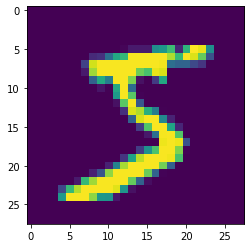

In [3]:
plt.imshow(x_train[0,:,:])

## Build a sequential model in Keras

In [4]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Activation('softmax'))

That's it, we've constructed out model. To compile it we use `model.compile`. We will use the Adam optimizer, which automatically sets a different learning schedule for each weight. For more information about Adam, see [Jason Brownlee's excelent post](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) or [the original paper of Kingma and Ba](https://arxiv.org/abs/1412.6980). 

To train the model, use

`model.fit(X_train, Y_train,
          batch_size=, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))`

* `X_train` is the whole set of training data.
* `Y_train` is the whole set of label data.
* `batch_size` is size of each training minibatch. Remember that 1 is __stochastic gradient decent__ while 60000 (the size of the whole data set) would be __gradient decent__. 
* `verbose` sets how much information to output during fitting. 0 = silent, 1 = progress bar, 2 = one line per epoch.
* `validation_data=()` specifies data to validate on after each training epoch. 

We will save the output of the training in a variable called `history` for later viewing. 

https://keras.io/models/model/

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3409 - accuracy: 0.9016 - val_loss: 0.1676 - val_accuracy: 0.9513
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1324 - accuracy: 0.9616 - val_loss: 0.1188 - val_accuracy: 0.9641
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0920 - accuracy: 0.9732 - val_loss: 0.0890 - val_accuracy: 0.9729
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0676 - accuracy: 0.9805 - val_loss: 0.0845 - val_accuracy: 0.9727
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0525 - accuracy: 0.9846 - val_loss: 0.0731 - val_accuracy: 0.9766
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.9879 - val_loss: 0.0702 - val_accuracy: 0.9775
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9907 - val_loss: 0.0708 - val_accuracy: 0.9768
Epoch 

#### Saving weights with Keras

Unlike pure tensorflow, Keras will track the tensorflow session by default, including keeping the model alive in a session for us. To save out the weights, we use `model.save(FILE_NAME)`. The weights can be recovered by using `model.load_weights`. Be warned: you have to build a model with the same architecture first and then load the weights into it. 

In [6]:
# saving the model
import os

SAVE_DIR = "./"
MODEL_NAME = 'keras_mnist.h5'
model_path = os.path.join(SAVE_DIR, MODEL_NAME)

model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./keras_mnist.h5 


#### Visualizing Training

Keras also saves the models training history. History store the training accuracy, the validation accuracy and the training loss and the validation loss. Below, we plot them against the epoch number

In [7]:
#history.history

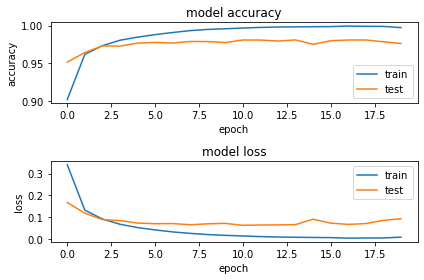

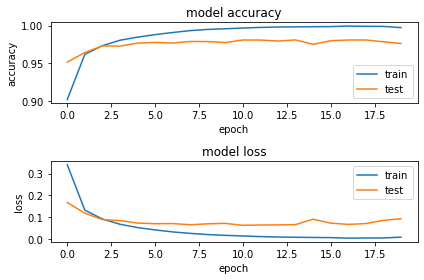

In [8]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# Convolutions

Before we start constructing a convolution network, lets take a moment to explore convolutions themselves to see what kinds of downstream layers our convolutions are creating. 



(427, 640, 3)


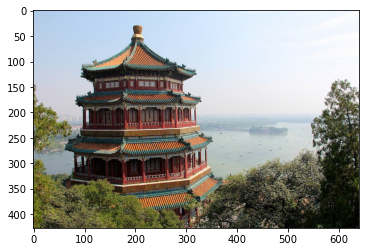

In [9]:
import numpy as np
from sklearn.datasets import load_sample_image
from matplotlib import pyplot as plt
import tensorflow as tf

china = load_sample_image("china.jpg") / 255
print(china.shape)

plt.imshow(china)

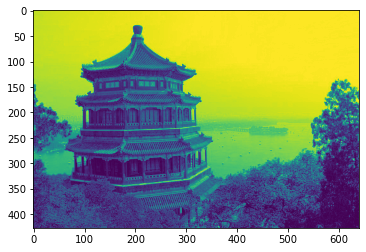

In [10]:
plt.imshow(china[:,:,2])

The picture we loaded is a color picture, and so has 3 channels (Red, Green, Blue). The shape tells us that the color channels are indexed by the third dimension of the array, and we can plot each channel separately:

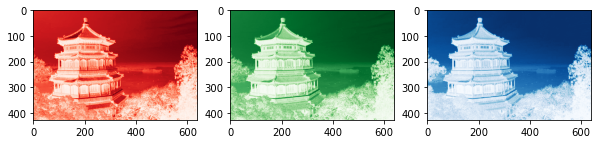

In [11]:
fig, axes = plt.subplots(1,3, figsize=(10, 5))

axes[0].imshow(china[:,:,0], cmap="Reds")
axes[1].imshow(china[:,:,1], cmap="Greens")
axes[2].imshow(china[:,:,2], cmap="Blues")

Given an $n\times m$ matrix $M$, a convolution passes over the image taking the dot product of each $n\times m$ rectangle with the weights of the matrix. 

<img width=600px src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L12Conv1.png">

Lets looks at some examples: The matrix 

$$
M= \left[
\begin{matrix}
0 &-1& 0
\\
0 & 0 & 0
\\
0&1&0
\end{matrix}
\right]
$$

is a horizontal edge detector, since the convolution of $M$ with a $3\times 3$ square of pixels is 0 if the intensity of the top central pixel is the same as the bottom. It only has a large value if the pixel intensity has changed drastically in the vertical direction. Given a convolution matrix like $M$, tensorflow's `tf.nn.conv2d` will compute the convolution for the entire image.

In [12]:
channels = 3
M = np.zeros([3,3,channels])
M[0,1,:] = -1
M[2,1,:] = 1
M

array([[[ 0.,  0.,  0.],
        [-1., -1., -1.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 0.,  0.,  0.]]])

In [13]:
channels = 3    # Since we're using RGB data

M = np.zeros([3,3,channels])

M[0,1,:] = -1     # Set the top ceter element to -1 for all 3 matricies
M[2,1,:] = 1      # Set the bottom ceter element to 1 for all 3 matricies
M[:,:,0]

array([[ 0., -1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  0.]])

We will now use scipy's ndimage library to convolve the 3d image. There is of course a native tensorflow way to do this (or you could write your own convolve function, it's fairly straight forward) but for just looking, this is the simplest. 

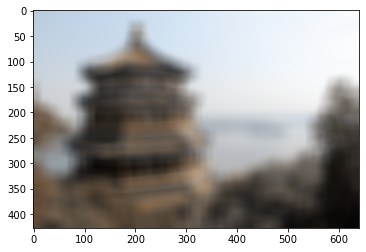

In [14]:
from scipy import ndimage

channels = 3
M = np.ones([30,30,channels])/(3*30*30)  # Bluring

conv = ndimage.filters.convolve(china, M)
plt.imshow(conv)

Similar to the vertical filter, a horizontal edge detector can be constructed from

$$
H= \left[
\begin{matrix}
0 &0& 0
\\
-1 & 0 & 1
\\
0&0&0
\end{matrix}
\right]
$$

Build out the edge detector below:

Edge detectors can also detect other kinds of features. For example, here is a $5\times 5$ angle detector:


$$
G= \left[
\begin{matrix}
0 &0& 0 & 0 & 0 
\\
0 &-1& -1 & -1 & -1 
\\
0 &-1& 1 & 1 & 1 
\\
0 &-1& 1 & 0 & 0 
\\
0 &-1& 1 & 0 & 0 
\end{matrix}
\right]
$$


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 0.  0.  0.  0.  0.]
 [ 0. -1. -1. -1. -1.]
 [ 0. -1.  1.  1.  1.]
 [ 0. -1.  1.  0.  0.]
 [ 0. -1.  1.  0.  0.]]


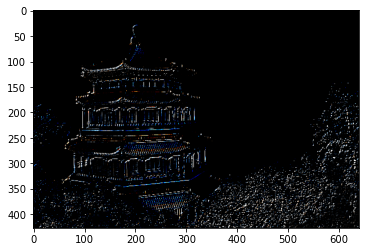

In [15]:
channels = 3    # Since we're using RGB data

G = np.zeros([5,5,channels])

G[1,1:5,:] = -1     
G[1:5,1,:] = -1     
G[2,2:5,:] = 1     
G[2:5,2,:] = 1 
print(G[:,:,0])

conv = ndimage.filters.convolve(china, G)
plt.imshow(conv)

And a Guassian blurring matrix:

$$
G = \left[\begin{matrix}
0.07& 0.13& 0.07\\ 
0.13& 0.20& 0.13\\
0.07& 0.13& 0.07
\end{matrix}\right]
$$

In [16]:
B = np.zeros([3,3,channels])
C = .25*np.array([0.07, 0.13, 0.07,
0.13, 0.20, 0.13,
0.07, 0.13, 0.07]).reshape(3,3)

B[:,:,0] = B[:,:,1] = B[:,:,2] = C

B[:,:,1]

array([[0.0175, 0.0325, 0.0175],
       [0.0325, 0.05  , 0.0325],
       [0.0175, 0.0325, 0.0175]])

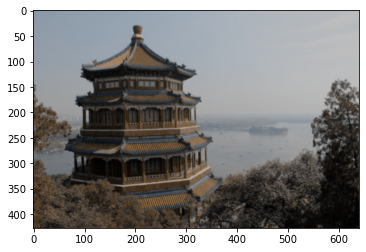

In [17]:
conv = ndimage.filters.convolve(china, B)
plt.imshow(conv)

# Convolutional Neural Networks

Lets try out our perceptron network on something a little more complicated. The fashion MNIST dataset has a very similar structure to MNIST except that instead of simple hand written digits it contains $28\times 28$ images of items of clothing:

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">

Here is a nonlinear 3 dimensional projection of the $28\times 28$ dimensional dataset using TSNE, courtesy of the datasets home repo (https://github.com/zalandoresearch/fashion-mnist)

 

We load it as below and process it with the same code as before. Take a moment to poke around the dataset before processing it, the labels are

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

In [18]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


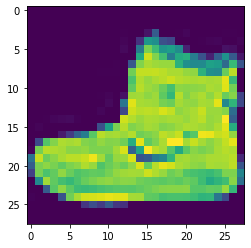

In [19]:
plt.imshow(x_train[0])

Processing the data:

In [20]:
NUM_LABELS = 10

## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
x_train: (60000, 28, 28)
X_train: (60000, 784)
y_train: (60000,)
Y_train: (60000, 10)


Now, try running the perceptron network about and note the validation error, you may need to increase the number of epochs to get reasonable results. 

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0825 - accuracy: 0.6295 - val_loss: 1.0140 - val_accuracy: 0.6454
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9788 - accuracy: 0.6529 - val_loss: 0.9986 - val_accuracy: 0.6492
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9488 - accuracy: 0.6581 - val_loss: 0.9731 - val_accuracy: 0.6530
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9338 - accuracy: 0.6622 - val_loss: 0.9563 - val_accuracy: 0.6603
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7804 - accuracy: 0.7316 - val_loss: 0.8107 - val_accuracy: 0.7299
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7412 - accuracy: 0.7413 - val_loss: 0.7800 - val_accuracy: 0.7333
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7258 - accuracy: 0.7441 - val_loss: 0.7662 - val_accuracy: 0.7367
Epoch 

#### Building a CNN

My error on the MLP never capped 82%, even with 100 epochs. Can we do better with a CNN? Recall that CNN's are comprised of stacks of convolution layers, activation layers, pooling layers and finally a flattening layer:

<table bgcolor="#fafafa"><tr>
    <td>__Convolution Layer__</td><td><img width=400 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5ConvLayer.PNG">
    </tr>
    <td>__Pooling Layer__</td><td><img width=300 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5PoolingLayer.PNG">
    </tr><tr>
    <td>__Flattening Layer__</td><td><img width=100 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5FlatteningLayer.PNG">
    </tr></table>
    
A convolution layer is defined with    
    
    `Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation='relu')`
                 
Where

* `nb_filters` number of convolution filters.
* `kernel_size` size of each filter, say [5,5] for a $5\times 5$ filter.
* `padding` When we convolve, we tend to lower the image size. We can choose to pad the image back to its original size or not. 
* `input_shape` shape of the inputed training data, only required for the first layer. 
* `activation` the activation layer following the convolution layer. 

For a pooling layer we only specify the pool size:

* `MaxPooling2D(pool_size=pool_size)` where `pool_size = [2,2]` down-samples by 2 in each direction. 

After we down-sample enough, we flatten and feed the network into a dense layer to do the fitting. The final architecture looks like the cartoon from class:

<img width= 700 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L12CNN2.PNG">

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D 

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## We renormalize the training data since we do not need to flatten it
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

## We have to add an extra dimension to allow for the multiple images we will be creating
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

## Construct CNN Network

In [24]:
## Construct Network
model = Sequential()
model.add(Conv2D(32, (7,7), padding = 'valid', input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D 

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## We renormalize the training data since we do not need to flatten it
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

## We have to add an extra dimension to allow for the multiple images we will be creating
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

Now, lets create our model. Our convolution layers will have $3\times 3$ filters followed by downsampling.

In [26]:
model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(28, 28,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_LABELS, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 512)              

Lets fit, and plot the results. Each epoch will take 10-100 s depending on your processor. 

In [27]:
epochs = 5

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 17s 35ms/step - loss: 0.7580 - accuracy: 0.7240 - val_loss: 0.4978 - val_accuracy: 0.8152
Epoch 2/5
469/469 [==============================] - 16s 34ms/step - loss: 0.4919 - accuracy: 0.8216 - val_loss: 0.4067 - val_accuracy: 0.8548
Epoch 3/5
469/469 [==============================] - 16s 34ms/step - loss: 0.4269 - accuracy: 0.8456 - val_loss: 0.3893 - val_accuracy: 0.8595
Epoch 4/5
469/469 [==============================] - 17s 36ms/step - loss: 0.3947 - accuracy: 0.8571 - val_loss: 0.3655 - val_accuracy: 0.8664
Epoch 5/5
469/469 [==============================] - 17s 37ms/step - loss: 0.3769 - accuracy: 0.8638 - val_loss: 0.3431 - val_accuracy: 0.8755


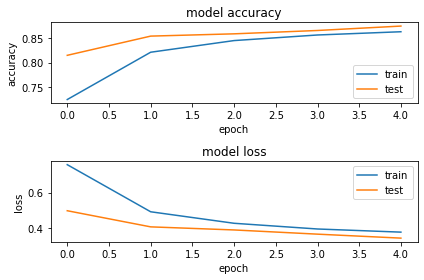

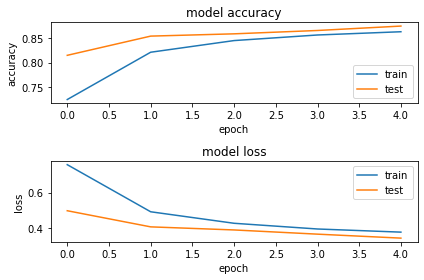

In [28]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Understanding the model

There are two things we would like to understand about a CNN: __what is it doing__ and __what is it not doing__? To answer the first question let open up the box a bit and see what the first few convolution kernels look like. 

The `model.layers[]` array gives a list of handlers for the model layers in the order given by summary. Note that you can also name your layers and call them that way. We then use `layer.get_weights()` to return the convolution and bias weights for each of the 32 kernel layers. 

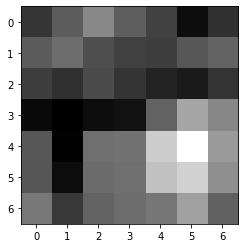

In [29]:
weights, biases = model.layers[0].get_weights()
plt.imshow(weights[:,:,0,1],cmap="Greys")

(7, 7, 1, 32)


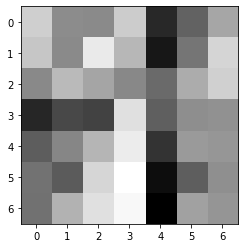

In [30]:
weights, biases = model.layers[0].get_weights()
print(weights.shape)

plt.imshow(weights[:,:,0,9],cmap="Greys")

#### Exercise:

Display all of the kernels in a grid. In addition, normalize the color scheme so that each image uses the same scheme. 

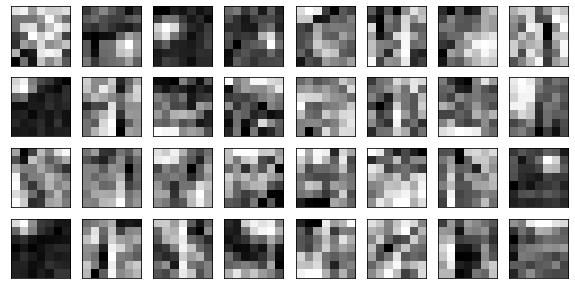

In [31]:
f, axes = plt.subplots(4,8, figsize=(10,5))

axes = axes.reshape(-1)
for i in range(32):
    axes[i].imshow(weights[:,:,0,i],cmap="Greys")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

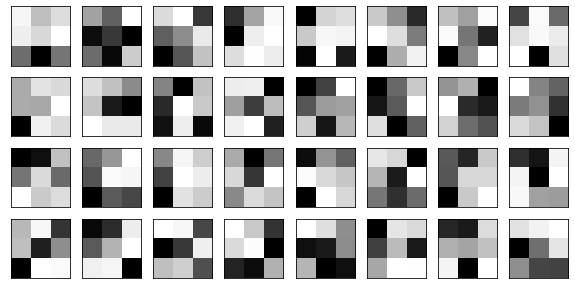

In [32]:
f, axes = plt.subplots(4,8, figsize=(10,5))

weights, biases = model.layers[2].get_weights()

axes = axes.reshape(-1)
for i in range(32):
    axes[i].imshow(weights[:,:,0,i],cmap="Greys")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

On the otherhand, its important to know what we're getting wrong. Lets construct the confusion matrix to discern which images the network has the hardest time classifying. 

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

<AxesSubplot:>

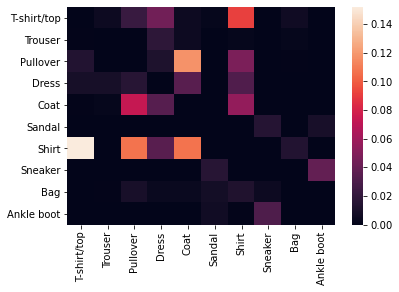

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_hat = np.argmax(model.predict(X_test),axis=1)
conf_mx = confusion_matrix(y_test, y_hat)

## Remove diagonal for better viewing
row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx/row_sum
np.fill_diagonal(nconf_mx,0)

labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

sns.heatmap(nconf_mx, xticklabels=labels, yticklabels=labels)

## Transfer Learning: Using Pretrained Models

This section is taken directly from the _Pretrained Models_ section of _Chapter 14_ of Geron. The code is mostly taken from the notebook accompanying Chapter 14. Please use that section as a companion to the code below. 

In this part of the  lab, we want to use the weights of a pretrained model to construct a new classifier. In this case, the pretrained model we will use is Xception model (https://arxiv.org/abs/1610.02357), with weights trained on the Imagenet dataset. We will use a data set of images of flowers from within tensorflow, and modify the output to classify flower types instead of the many label Imagenet categories. 

First, we load the flowers dataset from the Tensorflow datasets library `tensorflow_datasets`. If you do not already have this library, you may need to install it using `pip install tensorflow_datasets` from the anaconda prompt. 

#### Note: This part of the lab requires Tensroflow version 2.0.0. There is a problem with Tensorflow version 2.1.0 on the PC, you may need to downgrade to 2.0.0. (Maybe the problem already fixed.)

If you try to load the dataset and it dumps a bunch of random errors at you, downgrade to version 2.0.0 using

    pip uninstall tensorflow
    pip install tensorflow==2.0.0
    
   

In [34]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.8.0'

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

class_names = info.features["label"].names
print("Class Names:", class_names)
print(info)

The DatasetInfo dictionary contains a lot of information about the dataset. In this case we see that there are 3670 training images of various shapes and 5 classes. Finally, it tells us that the dataset has two "features", one called __images__ containing the images and one called __labels__, containing the labels. 

The dataset is stored in a `DatasetV1Adapter` object, which is designed to hold datasets in standardized way that only allows certain kinds of manipulations. While it's not easy to access the data directly, the `DatasetV1Adapter` allows us to sample $n$ points from the data using `DatasetV1Adapter.take(n)`, or iterate over the entire dataset as we would iterate over a standard list. 

Lets make a train test split using the `Dataset` functions:

In [ ]:
sp = ['train[:80%]', 'train[80%:90%]', 'train[90%:]']

(raw_train, raw_validation, raw_test) = tfds.load("tf_flowers", split=sp, as_supervised=True)
raw_train

We can sample a few images from the training data and display them with their labels. We use a for loop to iterate over the sample of the training data, saving out the image and the label:

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
index = 0
for image, label in raw_train.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

The CNN expects $224\times 224$ dimensional input images, and if you look above you'll notice that not all of the images are the same size. Our solution will be to crop the images down to size using `tf.image.resize`. We then use the `keras.applications.xception.preprocess_input` function to preprocess the pictures. A preprocessing function often accompanies a pretrained network and it used to put the input into the format the network expects. For example, some networks expect greyscale images, some networks expect image scaled between [0,1], other between [-1,1], others use centered images that are otherwise not normalized. 

There are a lot more data augmentation steps we could add to our preprocessing pipeline, including taking random cropings off our image, rotating, flipping or scaling the image. This is often helpful when you have a small training dataset. I will hold off on other preprocessing steps until the end of the lab. 

In [ ]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

To apply our preprocessing function to the data we need to use the `DatasetV1Adapter.map(func)` command. This will apply the function `func` to each element of the `DatasetV1Adapter` object. We then shuffle the data, split it into batches for training. Finally, we tell Python to __prefetch__ the data. Prefetching loads the data into memory now and stores it there. Otherwise, Python may try to intelligently allocate the resources by only loading images when they are needed. This will drastically slow down training

In [ ]:
batch_size = 32
raw_train = raw_train.shuffle(1000)
raw_train = raw_train.map(preprocess).batch(batch_size).prefetch(1)
raw_validation = raw_validation.map(preprocess).batch(batch_size).prefetch(1)
raw_test = raw_test.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in raw_train.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

Now we want to load the the Xception model and change it output dimension. We set `include_top=False` to remove the last two layers of the network: the global pooling layer and it's dense connection to the output layer. We will replace them with our own global pooling layer and output to our 5 classes. 

For Keras, since we're not using a sequential network, when we add new layers we just have to tell the network which outputs to connect them to. This is done via

    NewLayer = tf.keras.layers.LAYERTYPE(Parameters)(OldLayer)
    
Using this syntax, we add a __global pooling layer__ and a __dense layer__ with 5 outputs, one for each class. 

Note: The use of `tf.keras` forces keras to use the version compatible with the Tensorflow 2.0.0 backend, otherwise you will have errors. 

In [ ]:
raw_train

In [ ]:
n_classes = len(class_names)

base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

model.summary()

Finally, at first we don't want to train the all 20,871,725 parameters of the model, so we will freeze all of the layers we borrowed from Xception and only keep the weights of the last dense layer as trainable. 

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

### Lets train the model. On a CPU it will take around 20 minutes per epoch.

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(raw_train, epochs=5, validation_data=raw_validation)

After 5 epochs our model is doing fairly well. If you would like you can now unfreeze the upper layers and have them train too. This will take a while but you can actually acheave accuray of up to 95%. Not bad for an afternoons work.

##### More pretrained models https://keras.io/api/applications/



###### Constructing a CNN to classify the images in the MRI dataset. 

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

file_dir = 'D:/Users/Sunil/MRI_Images-1 (1)/MRI_Images/'

labels = pd.read_csv(file_dir + 'labels-1.csv')
display(labels)
y = labels.CDR


,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [73]:
data = np.zeros([609, 30976])
for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

In [74]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(data, y, test_size=0.2, random_state=0)


In [75]:
x_train1.shape

(487, 30976)

In [76]:
y_train1.shape

(487,)

In [77]:
## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
X_train = x_train1.astype('float32')
X_test = x_test1.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train1, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test1, NUM_LABELS)

print()
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train1.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train1.shape)
print('Y_train:', Y_train.shape)


MRI data loaded: train: 487 test: 122
x_train: (487, 30976)
X_train: (487, 30976)
y_train: (487,)
Y_train: (487, 4)


In [78]:
x_train1

array([[0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.42745098, 0.42352942, 0.42156863, ..., 0.40000001, 0.40000001,
        0.40000001],
       ...,
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001]])

In [79]:
X_train.shape

(487, 30976)

In [80]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 170, 170, 32)      1600      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 85, 85, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 83, 83, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 41, 41, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 41, 41, 32)        0         
                                                                 
 flatten_11 (Flatten)        (None, 53792)           

In [81]:
model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(176,176,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 170, 170, 32)      1600      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 85, 85, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 83, 83, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 41, 41, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 41, 41, 32)        0         
                                                                 
 flatten_12 (Flatten)        (None, 53792)           

In [82]:
X_train = X_train.reshape(-1, 176, 176, 1)
X_test = X_test.reshape(-1, 176, 176, 1)

In [83]:
tf.config.run_functions_eagerly(True)
epochs = 5

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/5


C:\Users\Sunil\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 16s 4s/step - loss: 0.8762 - accuracy: 0.6674 - val_loss: 0.5991 - val_accuracy: 0.8279
Epoch 2/5
4/4 [==============================] - 14s 3s/step - loss: 0.4548 - accuracy: 0.8768 - val_loss: 0.5347 - val_accuracy: 0.8279
Epoch 3/5
4/4 [==============================] - 13s 3s/step - loss: 0.4399 - accuracy: 0.8768 - val_loss: 0.5114 - val_accuracy: 0.8279
Epoch 4/5
4/4 [==============================] - 13s 3s/step - loss: 0.4314 - accuracy: 0.8768 - val_loss: 0.4982 - val_accuracy: 0.8279
Epoch 5/5
4/4 [==============================] - 13s 3s/step - loss: 0.4560 - accuracy: 0.8768 - val_loss: 0.5014 - val_accuracy: 0.8279


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D 

In [85]:
# saving the model
import os

SAVE_DIR = "./"
MODEL_NAME = 'keras_mnist.h5'
model_path = os.path.join(SAVE_DIR, MODEL_NAME)

model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./keras_mnist.h5 


In [86]:
X_train.shape

(487, 176, 176, 1)

In [87]:
y_train.shape

(369,)

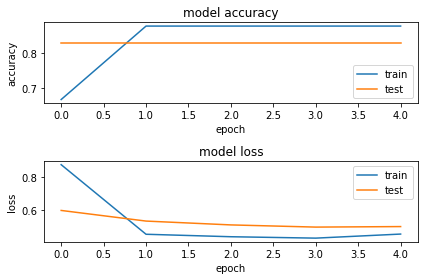

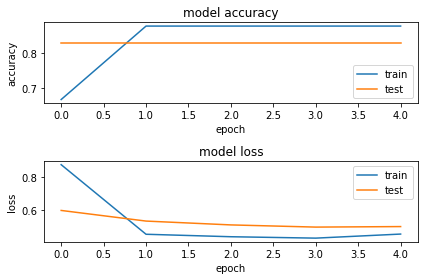

In [88]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Here I am getting an accuracy of 82.79% which is a good accuracy but we can make it better , In the problem below I have used another method which gives me a lower accuracy but it's good that we can see a high jump in accuracy when we are trying to use pretarined netwrok. 

# Using Pretrained Networks



In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras.utils import np_utils
import keras
import sys
import sklearn
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D 
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.8.0


In [13]:
def preprocess(image):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image

In [14]:
file_dir = 'D:/Users/Sunil/MRI_Images-1 (1)/MRI_Images/'
labels = pd.read_csv(file_dir + 'labels-1.csv',index_col=0)
display(labels)
y = labels.CDR

data = np.zeros([609,224,224,3])
for n, file_name in enumerate(labels.Filename):
    data[n,:] = preprocess(matplotlib.image.imread(file_dir + file_name)[:,:,0:3].reshape(1,176,176,3))

,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [16]:
#print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
#print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
#print('Y_train:', Y_train.shape)

x_train: (487, 224, 224, 3)
y_train: (487,)


In [17]:
dicty = {0:'tpye0',0.5:'tpye0.5',1:'tpye1',2:'tpye2'}
dicty2={'tpye0':0,'tpye0.5':1,'tpye1':2,'tpye2':3}
y_train = y_train.replace(dicty)
y_train = y_train.replace(dicty2)

In [18]:
NUM_LABELS = 4
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MRI data loaded: train: 487 test: 122
x_train: (487, 224, 224, 3)
X_train: (487, 224, 224, 3)
y_train: (487,)
Y_train: (487, 4)


In [9]:
model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(128, 224, 224),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 218, 32)      351264    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 109, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 107, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 53, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 29, 53, 32)        0         
                                                                 
 flatten (Flatten)           (None, 49184)             0

In [10]:
n_classes=NUM_LABELS
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                           

In [11]:
epochs = 20
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    verbose=1,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/20
4/4 [==============================] - 41s 10s/step - loss: 1.1603 - accuracy: 0.5072 - val_loss: 0.5136 - val_accuracy: 0.5410
Epoch 2/20
4/4 [==============================] - 36s 10s/step - loss: 1.0977 - accuracy: 0.4435 - val_loss: 0.6909 - val_accuracy: 0.5410
Epoch 3/20
4/4 [==============================] - 36s 10s/step - loss: 1.0528 - accuracy: 0.5791 - val_loss: 0.7934 - val_accuracy: 0.5410
Epoch 4/20
4/4 [==============================] - 37s 10s/step - loss: 1.0776 - accuracy: 0.4271 - val_loss: 0.6288 - val_accuracy: 0.5410
Epoch 5/20
4/4 [==============================] - 38s 10s/step - loss: 1.0977 - accuracy: 0.5791 - val_loss: 0.6488 - val_accuracy: 0.5410
Epoch 6/20
4/4 [==============================] - 38s 10s/step - loss: 1.0330 - accuracy: 0.5791 - val_loss: 0.6759 - val_accuracy: 0.5410
Epoch 7/20
4/4 [==============================] - 39s 11s/step - loss: 1.0563 - accuracy: 0.5791 - val_loss: 0.7354 - val_accuracy: 0.5410
Epoch 8/20
4/4 [===========

In [19]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MRI data loaded: train: 487 test: 122
x_train: (487, 224, 224, 3)
X_train: (487, 224, 224, 3)
y_train: (487,)
Y_train: (487, 4)


In [20]:
y_train

503    0
90     0
528    2
446    1
200    1
      ..
277    0
9      0
359    0
192    0
559    1
Name: CDR, Length: 487, dtype: int64

In [21]:
n_classes=NUM_LABELS
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

In [22]:
ids = list(set(labels.ID))


random.shuffle(ids)
ids_train = ids[:123]
ids_test = ids[123:]
tr_len = len(ids_train)
ts_len = len(ids_test)
print('Train Length:',tr_len)
print('Test Length:',ts_len)

X_train = np.zeros([369,224,224,3])
y_train = []
for n, ID in enumerate(ids_train):
    y_train = y_train + list(y[labels.ID == ID])
    
    for i, s in enumerate(["_55", "_120", "_180"]):
        file_name = file_dir + ID + s + '.png'
        tmp=matplotlib.image.imread(file_name)[:,:,0:3].reshape(1,176,176,3)
        X_train[3*n+i,:,:,:] = preprocess(tmp)
y_train=np.array(y_train)

print(len(y_train))

X_test = np.zeros([240,224,224,3])
y_test = []
for n, ID in enumerate(ids_test):
    y_test = y_test + list(y[labels.ID == ID])
    
    for i, s in enumerate(["_55", "_120", "_180"]):
        file_name = file_dir + ID + s + '.png'
        tmp=matplotlib.image.imread(file_name)[:,:,0:3].reshape(1,176,176,3)
        X_test[3*n+i,:,:,:] = preprocess(tmp)
y_test=np.array(y_test)
print(len(y_test))

NUM_LABELS=4
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

Train Length: 123
Test Length: 80
369
240


In [23]:
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)

MRI data loaded: train: 369 test: 240
x_train: (487, 224, 224, 3)
X_train: (369, 224, 224, 3)
y_train: (369,)
Y_train: (369, 4)


In [24]:
n_classes=NUM_LABELS
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

In [25]:
from tensorflow.keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [26]:
from tensorflow.keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(X_train)
vgg_features_val = pretrained_model.predict(X_test)

In [27]:
# OHE target column
train_target = Y_train
val_target = Y_test

In [28]:
train_target.shape

(369, 4)

In [29]:
vgg_features_train.shape

(369, 7, 7, 512)

In [30]:
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(4, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

# train model using features generated from VGG16 model
model2.fit(vgg_features_train, train_target, epochs=50, batch_size=128, validation_data=(vgg_features_val, val_target))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 100)               2508900   
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_12 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 4)                 404       
                                                                 
Total params: 2,509,704
Trainable params: 2,509,504
Non-trainable params: 200
__________________________________________

In [31]:
model2.evaluate(vgg_features_val,val_target)

8/8 [==============================] - 0s 5ms/step - loss: 0.5018 - accuracy: 0.8500


[0.5018321871757507, 0.8500000238418579]

## We constructed a CNN using the Pretrained Network to classify the images in the MRI dataset. And the acuuracy of our model has increased to 92.5% after pretraining